In [1]:
import pandas as pd
import seaborn as sns

In [2]:
event = pd.read_csv('/Users/qinyiqiu/Downloads/Event_entry.csv')
event.head()

,Entry,TicketClass,Sex,Age,Price,Order,Name,Ticket Number,Bank Balance
0,0,3,male,22.0,7,1,"Braund, Mr. Owen Harris",648155,74389
1,1,1,female,38.0,71,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",119239,94932
2,1,3,female,26.0,8,3,"Heikkinen, Miss. Laina",411408,26146
3,1,1,female,35.0,53,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",530093,35627
4,0,3,male,35.0,8,5,"Allen, Mr. William Henry",510583,60457


In [3]:
event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entry          869 non-null    int64  
 1   TicketClass    869 non-null    int64  
 2   Sex            869 non-null    object 
 3   Age            694 non-null    float64
 4   Price          869 non-null    int64  
 5   Order          869 non-null    int64  
 6   Name           869 non-null    object 
 7   Ticket Number  869 non-null    int64  
 8   Bank Balance   869 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 61.2+ KB


#### Bar chart or ticket class
we can see from the bar chart that ticket class is a categorical variables that include three difference categories. Ticket three has the highest frequencies. Ticket 1 and 2 has the similar frequencies and ticket 1 has a little bit higher frequencies than ticket 2.

<AxesSubplot:xlabel='TicketClass', ylabel='count'>

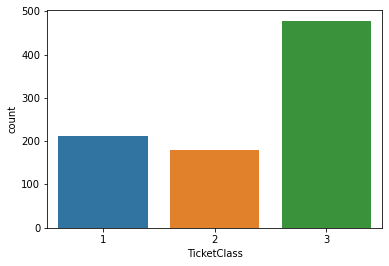

In [4]:
#barchart for ticket class
sns.countplot(x=event['TicketClass'], data=event)

#### barchart for gender of the event
We can see from the table that most of the people are male, about 600, and only about 300 female. This may imply that male are more likely to buy ticket than female.

<AxesSubplot:xlabel='Sex', ylabel='count'>

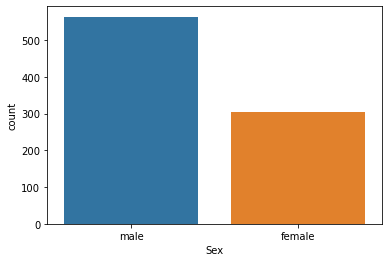

In [5]:
#barchart for gender
sns.countplot(x=event['Sex'])

#### histogram for age
We can see the distribution of the age for all customer. The distribution is non normality and it skews to the right. That means most the the customer are in age about 20s to 30s. This implies that as the age increase less people are likely to buy the ticket.

<AxesSubplot:xlabel='Age', ylabel='Count'>

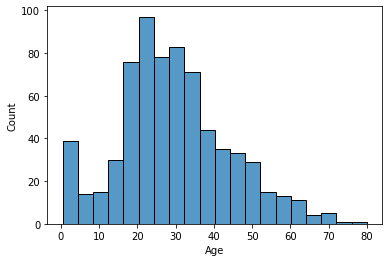

In [6]:
#histogram for age
sns.histplot(x=event['Age'])

#### Box plot for price
We drew box plot about price for both entry equal 1 and entry equal 0. We can. see the price distribution for entry. When entry equal 0, the range of the price is slightly smaller than when entry equal to 1. However, the distribution of the price for both entry equal to 0 and 1 are similar, most of the price concentrate in 0 to 100. So this boxplot implies that price may not be a significant element to classify entry 0 and 1.

<AxesSubplot:xlabel='Entry', ylabel='Price'>

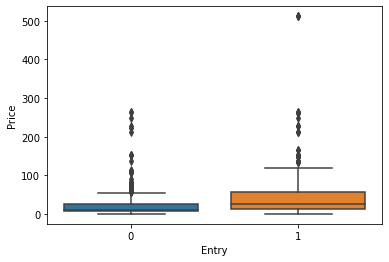

In [7]:
#boxplot for price
sns.boxplot(x=event['Entry'], y=event['Price'])

#### Boxplot for bank balance
we plotted a graph on bank balance against entry level. The distribution of the bank balance of customer are similar in both entry equal to 0 and 1. The range of them are relative the same. This imples that bank balance may not a element that lead to huge impact on entry level difference.

<AxesSubplot:xlabel='Entry', ylabel='Bank Balance'>

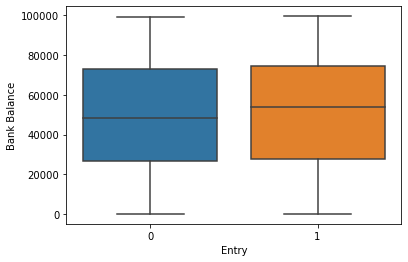

In [8]:
##boxplot for bank balance
sns.boxplot(x=event['Entry'], y=event['Bank Balance'])

### Part 2 PCA Analysis

In this question, we first checked if we hace any missing values in out dataset and we filled all the missing values in age in mean age. Then we encoded our gender variable into dummy variable and scaled it. Since we found the name is unique variable and it won't provide any useful information in prediction, we dropped the variable.

In logistic regressio, we got accuacy for out of sample about 81%. 

In PCA, we first plotted tha explained variance ratio plot to see how many variances are explained by each components. The explained variance graph shows that the component 0 has the highest explained variance ratio. Which means it explained the most variance in the dataset compared to the other principal components. And the explained variance ratio decreasing gradually, which is component 0 has the highest explained variance ratio, and the sixth principal components has the lowest explained variance ratio. According to our calculation, the first two principal components explained about 41% variance. For pca including first 4 components, they explained about 70% variance. For pca including first 6 components, they explained about 94%. Hence, as we including more principal components, we will explained more variance in our dataset. Hence, when we plot our dataset using pca in logistic regression, for accuracy by using pca6 should higher than pca4 and the accuracy by using pca4 is higher than pca2. We got about 77% for pca2, 78% for pca4, and 80% accuracy for pca 6.

In Lasso, we got out of sample accuracy about 82%.

In conclusion, in our dataset, lasso regression does the best prediction on classifying entry level by using our predictions.

In [9]:
#check missing values
event.isnull().sum()

Entry              0
TicketClass        0
Sex                0
Age              175
Price              0
Order              0
Name               0
Ticket Number      0
Bank Balance       0
dtype: int64

In [10]:
#replace missing values with mean value
age_mean = event['Age'].mean()
event['Age'].fillna(age_mean, inplace=True)
event.isnull().sum()

Entry            0
TicketClass      0
Sex              0
Age              0
Price            0
Order            0
Name             0
Ticket Number    0
Bank Balance     0
dtype: int64

In [11]:
#encode variables and split into train and test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

event['Sex'] = event['Sex'].map({'male': 1, 'female': 0})

train_df, test_df = train_test_split(event, test_size=0.2, random_state=40)
X_train_unscale = train_df.drop(['Name','Entry'],axis=1)
X_train = pd.DataFrame(scaler.fit_transform(X_train_unscale), columns=X_train_unscale.columns)
y_train = train_df['Entry']
X_test_unscale = test_df.drop(['Name','Entry'],axis=1)
X_test = pd.DataFrame(scaler.transform(X_test_unscale), columns=X_test_unscale.columns)
y_test = test_df['Entry']
X_train

,TicketClass,Sex,Age,Price,Order,Ticket Number,Bank Balance
0,0.815681,0.730901,-0.593664,-0.494147,-0.569522,1.133005,1.706283
1,-1.566245,0.730901,1.631128,-0.112623,1.674701,0.353467,0.143971
2,-0.375282,0.730901,-0.900532,0.831149,-0.183673,1.245035,1.339336
3,0.815681,-1.368174,0.863958,0.148420,0.812447,-1.362429,-0.148514
4,0.815681,0.730901,-0.000471,-0.494147,0.107682,-0.950509,-1.658663
...,...,...,...,...,...,...,...
690,-0.375282,-1.368174,1.170826,-0.132703,0.032874,-0.810363,-0.324992
691,0.815681,0.730901,-1.590984,-0.233104,-1.049865,1.608068,0.918807
692,0.815681,0.730901,-2.128003,-0.233104,-1.671948,-0.585333,0.529844
693,-0.375282,0.730901,0.020072,-0.433907,-0.837254,-1.491371,-1.077173


#### logistic model

In [12]:
Logimodel = LogisticRegression()
Logimodel.fit(X_train, y_train).coef_

array([[-0.97987888, -1.23899472, -0.41387862,  0.01851689,  0.0097499 ,
        -0.17483582,  0.09583772]])

In [13]:
predictions = Logimodel.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8160919540229885

#### PCA

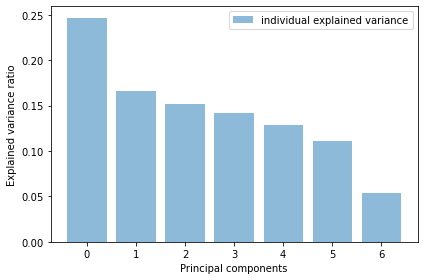

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA()
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

explained_variance=pca.explained_variance_ratio_
plt.figure(figsize=(6, 4))

plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center',
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [15]:
#for pca 2
explained_variance[0]+explained_variance[1]

0.41265672922710506

In [16]:
#for pca 4
explained_variance[0]+explained_variance[1]+explained_variance[2]+explained_variance[3]

0.7061127654529648

In [17]:
#for pca 6
explained_variance[0]+explained_variance[1]+explained_variance[2]+explained_variance[3]+explained_variance[4]+explained_variance[5]

0.9461628707276738

In [18]:
pca_2 = PCA(n_components=2)
pca_4 = PCA(n_components=4)
pca_6 = PCA(n_components=6)

X_train_pca_2 = pca_2.fit_transform(X_train)
X_test_pca_2 = pca_2.transform(X_test)

X_train_pca_4 = pca_4.fit_transform(X_train)
X_test_pca_4 = pca_4.transform(X_test)

X_train_pca_6 = pca_6.fit_transform(X_train)
X_test_pca_6 = pca_6.transform(X_test)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
Logimodel = LogisticRegression()
#pca 2
Logimodel.fit(X_train_pca_2, y_train)
predictions2 = Logimodel.predict(X_test_pca_2)
accuracy2 = accuracy_score(y_test, predictions2)
accuracy2
print(f'The accuracy for pca2 is:{accuracy2}')
#pca 4
Logimodel.fit(X_train_pca_4, y_train)
predictions4 = Logimodel.predict(X_test_pca_4)
accuracy4 = accuracy_score(y_test, predictions4)
accuracy4
print(f'The accuracy for pca4 is:{accuracy4}')

#pca 6
Logimodel.fit(X_train_pca_6, y_train)
predictions6 = Logimodel.predict(X_test_pca_6)
accuracy6 = accuracy_score(y_test, predictions6)
accuracy6
print(f'The accuracy for pca6 is:{accuracy6}')

The accuracy for pca2 is:0.7701149425287356
The accuracy for pca4 is:0.7816091954022989
The accuracy for pca6 is:0.8045977011494253


#### Lasso Model

In [20]:
lassomodel = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', max_iter=10000)
lassomodel.fit(X_train, y_train)
y_pred_lasso = lassomodel.predict(X_test)
lasso_accuracy = accuracy_score(y_test, y_pred_lasso)
print(f'The accuracy for pca6 is:{lasso_accuracy}')

The accuracy for pca6 is:0.8218390804597702


### Part 3 Decision Tree Analysis
In this question, we dropped order and ticket number since both this variables are unique, and they don't provide any useful information on classifying. And they cannot be classified. Then we fit our dataset into decision trees with a maximum depth of 3. The model achieved an accuracy of approximately 83.9% on the test data. The mean squared error was approximately 0.1609. the model performed well in terms of accuracy for a classification task.

In [21]:
# drop unnecessary column: Ticket number and Order
X_train_tree = X_train.drop(['Order','Ticket Number'],axis=1)
X_test_tree = X_test.drop(['Order','Ticket Number'],axis=1)
X_train_tree.head()

,TicketClass,Sex,Age,Price,Bank Balance
0,0.815681,0.730901,-0.593664,-0.494147,1.706283
1,-1.566245,0.730901,1.631128,-0.112623,0.143971
2,-0.375282,0.730901,-0.900532,0.831149,1.339336
3,0.815681,-1.368174,0.863958,0.148420,-0.148514
4,0.815681,0.730901,-0.000471,-0.494147,-1.658663


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
Decisiontree = DecisionTreeClassifier(max_depth=3) 
Decisiontree.fit(X_train_tree, y_train)
predictions_tree = Decisiontree.predict(X_test_tree)
mse = mean_squared_error(y_test, predictions_tree)
print(f'The mse for Decision Tree is:{mse}')
accuracy_tree = accuracy_score(y_test, predictions_tree)
print(f'The accuracy for Decision Tree is:{accuracy_tree}')

The mse for Decision Tree is:0.16091954022988506
The accuracy for Decision Tree is:0.8390804597701149


### Part 4 K means
In this question, we use K means to classify our entry level. We only use age and price to predict. First, we tried to find out what K values is better to use in our dataset. So we tried 20 K and ploted Elbow graph. From the Elbow plot we can see the slop is decreasing. for the first three points they dramactically decrease the number of clusters so we choosed k=3 in our k means model. With K=3, our k means model claffied 3 clusters as we can see in our plot.

In [23]:
#use the Age and Price columns only
train_K = X_train[['Age','Price']]
train_K.head()

,Age,Price
0,-0.593664,-0.494147
1,1.631128,-0.112623
2,-0.900532,0.831149
3,0.863958,0.148420
4,-0.000471,-0.494147


Within cluster sum of squares for K=1 is:1390.0
Within cluster sum of squares for K=2 is:932.0364502784073
Within cluster sum of squares for K=3 is:567.204786865359
Within cluster sum of squares for K=4 is:404.757091852232
Within cluster sum of squares for K=5 is:306.7352102484534
Within cluster sum of squares for K=6 is:250.67949647023582
Within cluster sum of squares for K=7 is:200.5520864534505
Within cluster sum of squares for K=8 is:165.8699537602344
Within cluster sum of squares for K=9 is:133.8997456380223
Within cluster sum of squares for K=10 is:114.1432421782843
Within cluster sum of squares for K=11 is:102.72526166612138
Within cluster sum of squares for K=12 is:91.30872593492788
Within cluster sum of squares for K=13 is:85.10165654792326
Within cluster sum of squares for K=14 is:78.98978751135448
Within cluster sum of squares for K=15 is:73.1766250434012
Within cluster sum of squares for K=16 is:68.1871025414423
Within cluster sum of squares for K=17 is:61.882439853239475
W

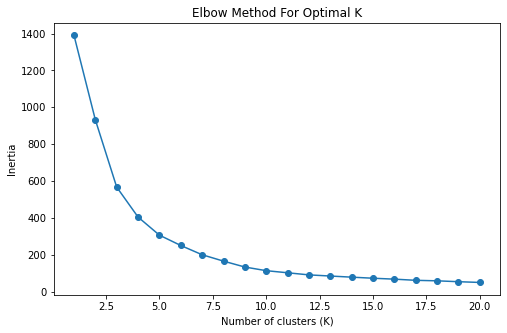

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

K_values = range(1, 21)
inertia_values = []

for K in K_values:
    kmeans_model = KMeans(n_clusters=K, random_state=42)
    kmeans_model.fit(train_K)
    inertia_values.append(kmeans_model.inertia_)
    print(f'Within cluster sum of squares for K={K} is:{kmeans_model.inertia_}')

# Plotting the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(K_values, inertia_values, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()


In [25]:
#choosing K=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(train_K)
train_K.head()

,Age,Price
0,-0.593664,-0.494147
1,1.631128,-0.112623
2,-0.900532,0.831149
3,0.863958,0.148420
4,-0.000471,-0.494147


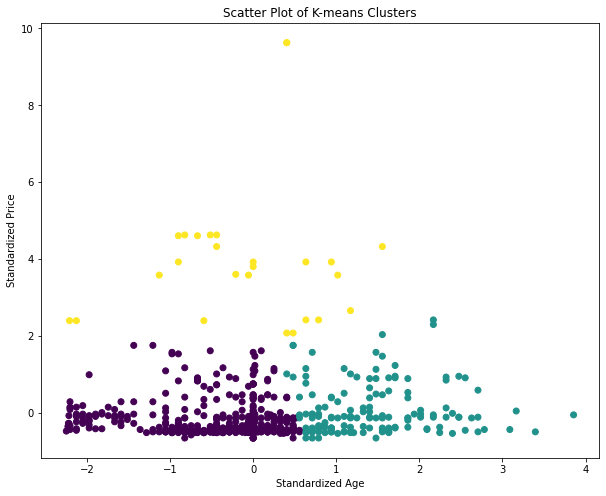

In [26]:
plt.figure(figsize=(10, 8))
plt.scatter(train_K['Age'], train_K['Price'], c=kmeans.labels_, cmap='viridis')  # Color points by cluster label
plt.xlabel('Standardized Age')
plt.ylabel('Standardized Price')
plt.title('Scatter Plot of K-means Clusters')
plt.show()